In [10]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [18]:
# Load wind data
wind_df = pd.read_csv("German_Wind_Power/50Hertz.csv")

In [19]:
wind_df.Date = pd.to_datetime(wind_df.Date)
wind_df["year"] = pd.DatetimeIndex(wind_df["Date"]).year
wind_df["month"] = pd.DatetimeIndex(wind_df["Date"]).month
wind_df.head()

,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,...,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00,year,month
0,2019-08-23,74,73,63,55,54,53,51,52,45,...,63,61,57,52,51,49,45,40,2019,8
1,2019-08-24,37,38,35,35,31,32,30,29,28,...,112,107,104,104,99,95,95,96,2019,8
2,2019-08-25,93,88,85,81,76,80,81,76,73,...,103,96,93,88,86,82,80,77,2019,8
3,2019-08-26,72,66,59,54,48,46,45,43,42,...,47,46,47,49,50,51,48,42,2019,8
4,2019-08-27,39,38,36,36,34,31,31,30,31,...,51,52,51,52,54,54,56,59,2019,8


In [20]:
# Subset to seasons
spring = wind_df.loc[wind_df["month"].isin([3,4,5])]
summer = wind_df.loc[wind_df["month"].isin([6,7,8])]
autumn = wind_df.loc[wind_df["month"].isin([9,10,11])]
winter = wind_df.loc[wind_df["month"].isin([1,2,12])]

seasons = [spring, summer, autumn, winter]

In [32]:
# Get ECDF and samples for each hour in each season
n_sample = 101
quantile = np.linspace(0, 1, n_sample)
samples = np.zeros((4, 24, n_sample-1))


for s in range(4):
    df = seasons[s]
    for h in range(24):
        i = np.arange(4*h+1, 4*h+5)
        test = df.iloc[:, i]
        test = test.to_numpy().flatten()
        # Estimate ECDF
        ecdf = ECDF(test)
        # Inverse sampling
        sample = np.interp(quantile, ecdf.y, ecdf.x)
        samples[s, h, :] = sample[1:]

In [35]:
name = ["spring", "summer", "autumn", "winter"]
# Save sample data
for s in range(4):
    data = samples[s, :, :]
    filename = name[s] + "_wind.csv"
    np.savetxt(filename, data, delimiter=",")

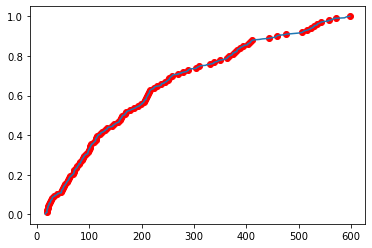

In [25]:
plt.plot(ecdf.x, ecdf.y)
plt.scatter(sample, quantile, c='r')
plt.show()